In [1]:
''' Import packages. '''
# Time packages
import calendar, cftime, datetime, time
# Numerical analysis packages
import numpy as np, random, scipy, numba
# Local data storage packages
import functools, importlib, os, pickle, collections, sys
import pandas as pd, xarray as xr, nc_time_axis
xr.set_options(keep_attrs=True)
# Visualization tools
import cartopy, cartopy.crs as ccrs, matplotlib, matplotlib.pyplot as plt

# Local imports
import moc, zonal_mean
importlib.reload(zonal_mean);
importlib.reload(moc);

In [2]:
importlib.reload(zonal_mean);

model_names = ['AM2.5', 'HIRAM']
experiment_names = ['CONST', '0N', '15N', 'TIMEVAR', 'AMIP']
field_names = ['ucomp', 'vcomp']
data = zonal_mean.load(model_names=model_names, 
                       experiment_names=experiment_names, 
                       field_names=field_names,
                       zonal_average=False,
                       time_average=False,
                       pressure_level=None)

In [3]:
model_names = list(sorted(set([config_name.split(':')[0] for config_name in data.keys()]))) 
experiment_names = ['CONST', '0N', '15N', 'TIMEVAR', 'AMIP']

moc_configs = {}
for experiment_name in experiment_names:
    for experiment_type in ['CTL', 'DIFF']:
        moc_configs[f'{experiment_name}:{experiment_type}'] = [config for config in data.keys()
                                                               if experiment_name in config
                                                               and f':{experiment_type}' in config]

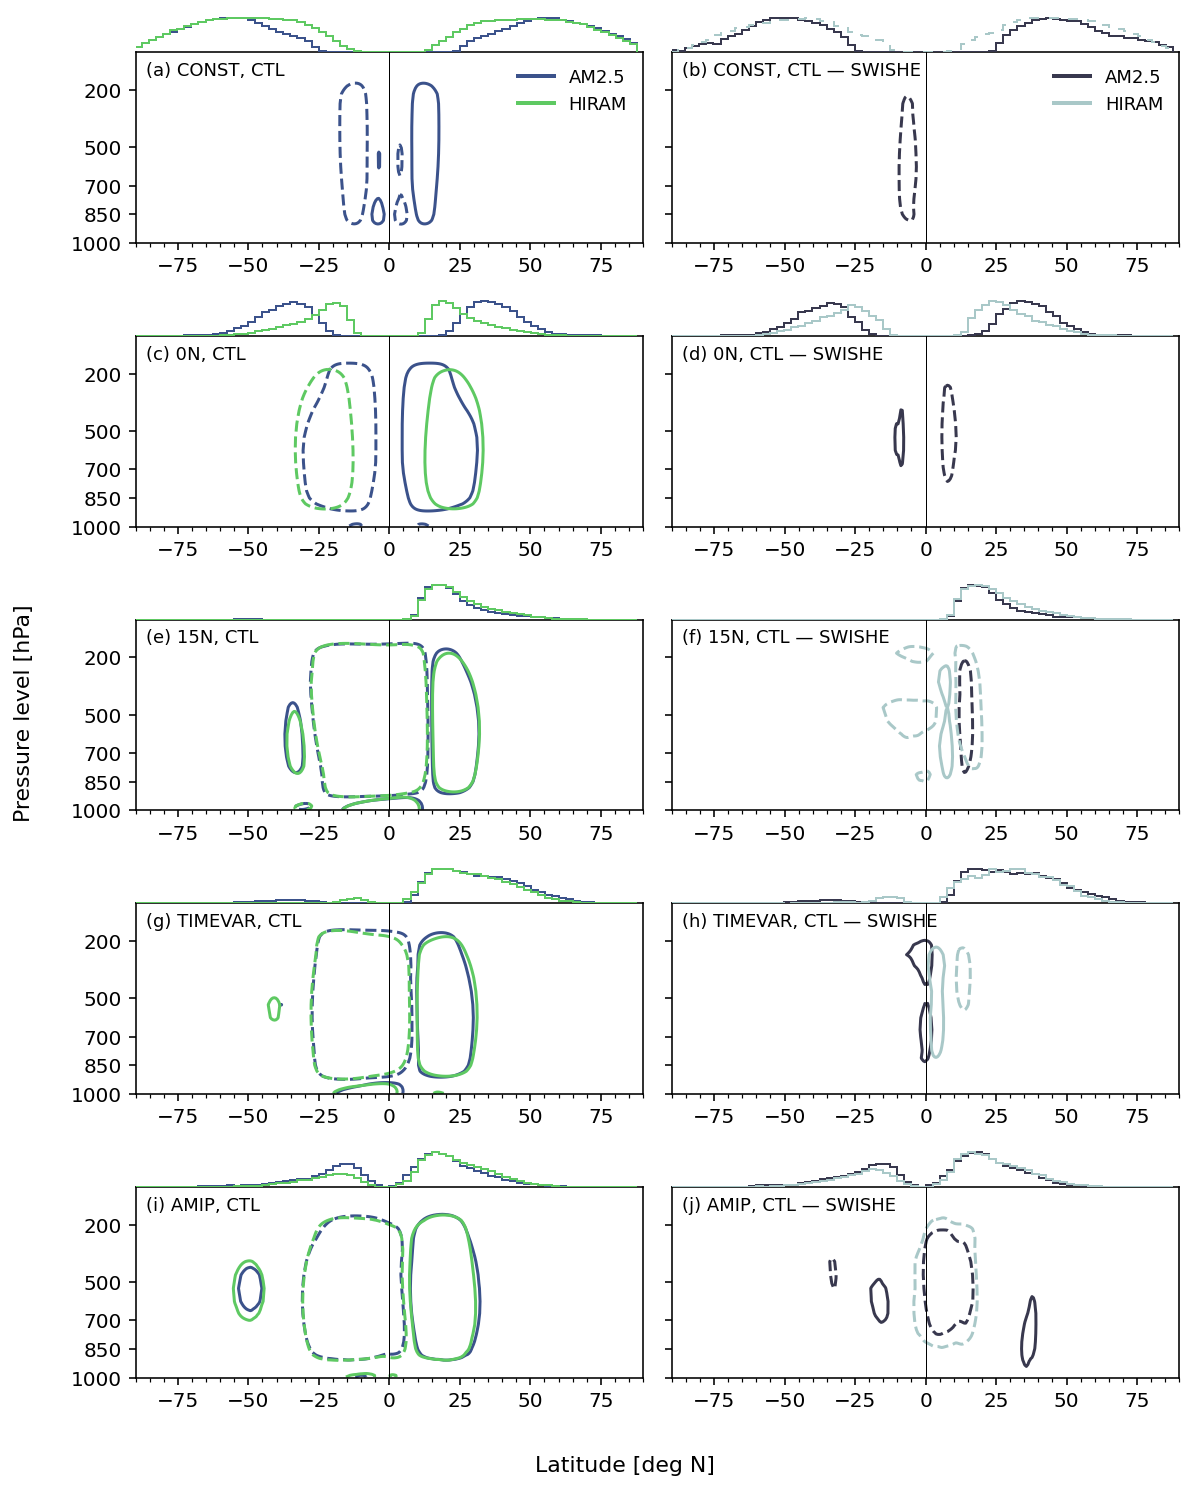

In [6]:
importlib.reload(moc);

psi_magnitudes = {'CTL': 30e9, 'DIFF': 6e9}
# Generate the plot
moc.multiplot_overturning_circulation(data=data,
                                      configuration_names=moc_configs,
                                      psi_magnitudes=psi_magnitudes)